#**Linear Discriminant Analysis**

In [ ]:
# Load Packages
import numpy as np
#https://numpy.org/doc/stable/user/tutorials_index.html

import pandas as pd
#https://pandas.pydata.org/docs/reference/index.html

import matplotlib.pyplot as plt
#https://matplotlib.org/tutorials/index.html

%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
print(df.shape)

(150, 5)


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df_2=df.loc[df['species'].isin(['setosa', 'versicolor'])] 

In [ ]:
df_2D=df_2.drop(['sepal_length', 'sepal_width'], axis=1)

In [ ]:
df_2D

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
95,4.2,1.2,versicolor
96,4.2,1.3,versicolor
97,4.3,1.3,versicolor
98,3.0,1.1,versicolor


In [ ]:
Data_2D=df_2D.loc[45:54,:]

In [ ]:
Data_2D

,petal_length,petal_width,species
45,1.4,0.3,setosa
46,1.6,0.2,setosa
47,1.4,0.2,setosa
48,1.5,0.2,setosa
49,1.4,0.2,setosa
50,4.7,1.4,versicolor
51,4.5,1.5,versicolor
52,4.9,1.5,versicolor
53,4.0,1.3,versicolor
54,4.6,1.5,versicolor


In [ ]:
Df_Data=Data_2D.drop(['species'], axis=1)

In [ ]:
mean_x1=np.mean(Data_2D['petal_length'].values) #overall mean for feature 1
mean_x2=np.mean(Data_2D['petal_width'].values) #overall mean for feature 2

In [ ]:
print(mean_x1)
print(mean_x2)

3.0
0.8300000000000001


#Within class scatter matrix

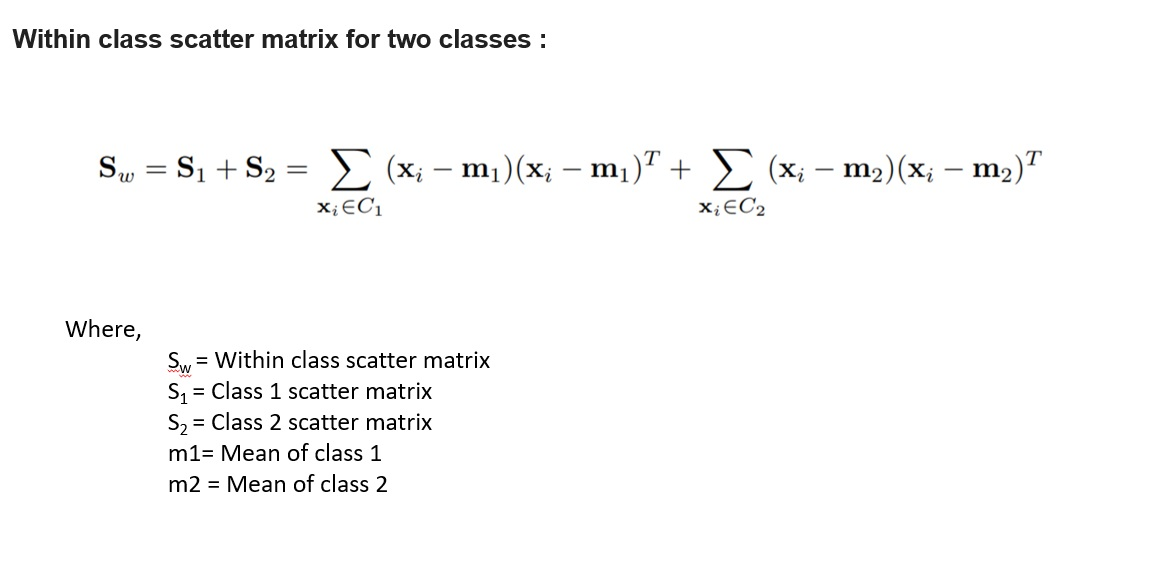

**class 1**

In [ ]:
c1=Data_2D.loc[df['species'].isin(['setosa'])]

print(c1)

    petal_length  petal_width species
45           1.4          0.3  setosa
46           1.6          0.2  setosa
47           1.4          0.2  setosa
48           1.5          0.2  setosa
49           1.4          0.2  setosa


**Class 2**

In [ ]:
c2=Data_2D.loc[df['species'].isin(['versicolor'])]
print(c2)

    petal_length  petal_width     species
50           4.7          1.4  versicolor
51           4.5          1.5  versicolor
52           4.9          1.5  versicolor
53           4.0          1.3  versicolor
54           4.6          1.5  versicolor


**Scatter matrix for class 1**

In [ ]:
#Mean of feature 1 and feature 2 for class 1
mean_c1_x1=np.mean(c1['petal_length'].values) 
mean_c1_x2=np.mean(c1['petal_width'].values)

In [ ]:
print(mean_c1_x1)
print(mean_c1_x2)

1.4600000000000002
0.21999999999999997


In [ ]:

c1_x1=(c1['petal_length']-mean_c1_x1)
c1_x2=(c1['petal_width']-mean_c1_x2)

In [ ]:
x1=pd.concat([c1_x1, c1_x2], axis=1)

In [ ]:
x1

,petal_length,petal_width
45,-0.06,0.08
46,0.14,-0.02
47,-0.06,-0.02
48,0.04,-0.02
49,-0.06,-0.02


In [ ]:
data1=x1.values

In [ ]:
n_samples = data1.shape[0]
sca_matrix1 = (np.dot(data1.T, data1))

In [ ]:
print(sca_matrix1)

[[ 0.032 -0.006]
 [-0.006  0.008]]


**Scatter matrix for class 2**

In [ ]:
mean_c2_x1=np.mean(c2['petal_length'].values)
mean_c2_x2=np.mean(c2['petal_width'].values)

In [ ]:
print(mean_c2_x1)
print(mean_c2_x2)

4.540000000000001
1.44


In [ ]:
c2_x1=(c2['petal_length']-mean_c2_x1)
c2_x2=(c2['petal_width']-mean_c2_x2)

In [ ]:
x2=pd.concat([c2_x1, c2_x2], axis=1)

In [ ]:
x2

,petal_length,petal_width
50,0.16,-0.04
51,-0.04,0.06
52,0.36,0.06
53,-0.54,-0.14
54,0.06,0.06


In [ ]:
data2=x2.values

In [ ]:
n_samples = data2.shape[0]
sca_matrix2 = (np.dot(data2.T, data2))

In [ ]:
print(sca_matrix2)

[[0.452 0.092]
 [0.092 0.032]]


In [ ]:
Sw=((sca_matrix1)+(sca_matrix2))

**Within class scatter matrix**

In [ ]:
Sw

array([[0.484, 0.086],
       [0.086, 0.04 ]])

#Between class scatter matrix

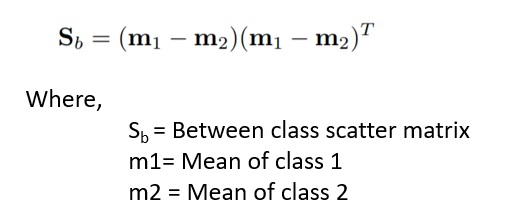

In [ ]:
MEAN1=mean_c1_x1-mean_c2_x1
MEAN2=mean_c1_x2-mean_c2_x2

In [ ]:
M1_NP=np.array([[MEAN1],[MEAN2]])

In [ ]:
M1_NP

array([[-3.08],
       [-1.22]])

In [ ]:
MEANN=((np.dot(M1_NP, M1_NP.T)))

In [ ]:
SB=MEANN

In [ ]:
SB

array([[9.4864, 3.7576],
       [3.7576, 1.4884]])

#Eigen Decomposition

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(np.dot(np.linalg.inv(Sw),SB))

In [ ]:
id = np.argsort(eig_vals, axis=0)[::-1]
sorted_EigenVectors = eig_vecs[:, id]

In [ ]:
print(eig_vecs)

[[-0.36826591 -0.05605423]
 [ 0.9297205  -0.99842773]]


In [ ]:
print(eig_vals)

[ 0.         37.90825811]


#LDA

In [ ]:
lda=np.dot(Df_Data.values, sorted_EigenVectors[:, :1])

In [ ]:
sorted_EigenVectors[:, :1]

array([[-0.05605423],
       [-0.99842773]])

In [ ]:
df_lda=pd.DataFrame(lda)

In [ ]:
lda

array([[-0.37800425],
       [-0.28937232],
       [-0.27816147],
       [-0.2837669 ],
       [-0.27816147],
       [-1.66125372],
       [-1.74988564],
       [-1.77230734],
       [-1.52217298],
       [-1.75549107]])

In [ ]:
Y=Data_2D.loc[:,'species']

In [ ]:
rows_setosa = Y=='setosa';
rows_versicolor = Y=='versicolor';

In [ ]:
print((df_lda.loc[rows_setosa.tolist(), 0]).shape)
print(df_lda.loc[rows_versicolor.tolist(), 0].shape)

(5,)
(5,)


Text(0.5, 1.0, 'Scatterplot of 2D data')

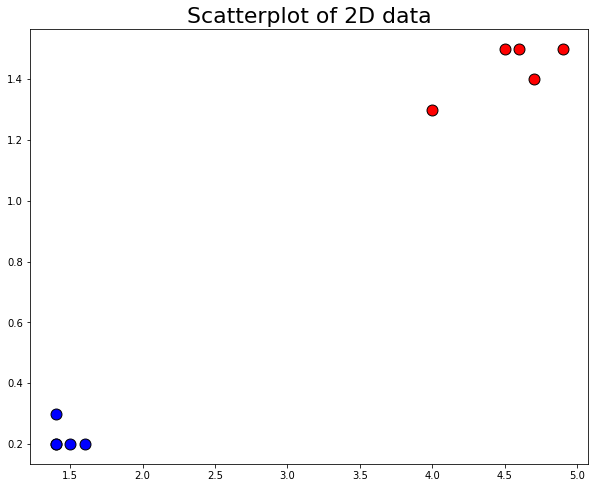

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(Data_2D.loc[rows_setosa.tolist(), 'petal_length'], Data_2D.loc[rows_setosa.tolist(), 'petal_width'], c='blue', edgecolor='k', s=120, label='Zero')
ax.scatter(Data_2D.loc[rows_versicolor.tolist(), 'petal_length'], Data_2D.loc[rows_versicolor.tolist(), 'petal_width'], c='red', edgecolor='k', s=120, label='One')
ax.set_title("Scatterplot of 2D data", fontsize=22)

Text(0.5, 1.0, 'Scatterplot of 1st linear discriminant')

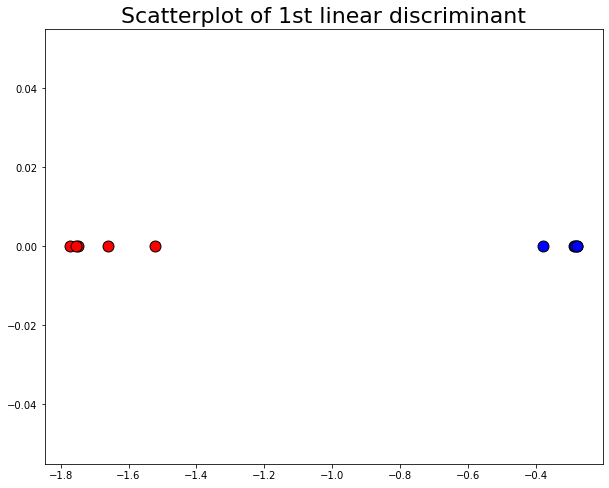

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(df_lda.loc[rows_setosa.tolist(), 0], np.zeros([5]), c='blue', edgecolor='k', s=120, label='Zero')
ax.scatter(df_lda.loc[rows_versicolor.tolist(), 0], np.zeros([5]), c='red', edgecolor='k', s=120, label='One')
ax.set_title("Scatterplot of 1st linear discriminant", fontsize=22)